### 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 
#### The data contains the following fields:

* lat : Latitude
* lng:  Longitude
* desc: Description of the Emergency Call
* zip:  Zipcode
* title:Title
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e: Dummy variable (always 1)

### Import numpy, pandas and visualization libraries

In [85]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline

### Read in the 911.csv file as a dataframe

In [86]:
df_emer=pd.read_csv('/kaggle/input/emergency-911/911 - 911.csv')

### Check the info() of the df

In [87]:
df_emer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Check the head of df 

In [88]:
df_emer.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Get the descriptive statistics of the df

In [89]:
df_emer.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### Answer the following questions:

#### What are the top 5 zipcodes for 911 calls?
##### Hint: Use value_counts()

In [90]:
top=df_emer['zip'].value_counts().head()
top

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?
##### Visualize your results.

In [91]:
top_twp=df_emer['twp'].value_counts().head()
top_twp

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

<Axes: xlabel='twp'>

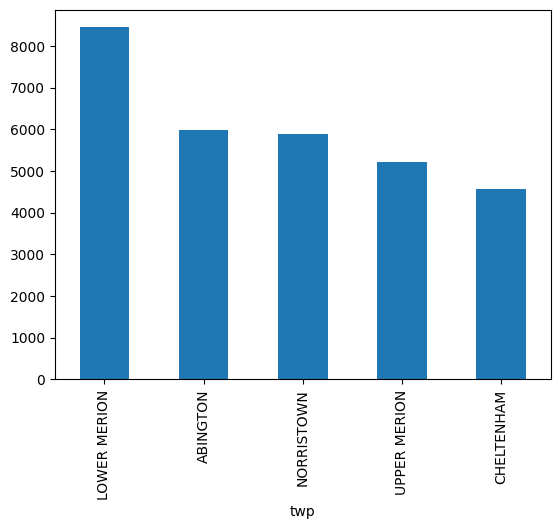

In [92]:
top_twp.plot(kind='bar')

In [93]:
df_emer.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Take a look at the 'title' column, how many unique title codes are there?
#### What are those titles?
##### Hint: use unique() and nunique()

In [94]:
num_uni=df_emer['title'].nunique()
num_uni


110

In [95]:
num=df_emer['title'].unique()
num

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

## Creating new features

- In the titles column there are "Reasons/Departments" specified before the title code. 
- These are <b>EMS, Fire, and Traffic</b>. 
- Use .apply() with a custom lambda expression to create a new column called "Reason" that contains these string values. 
- For example, if the title column value is <b>EMS: BACK PAINS/INJURY</b> , the Reason column value would be <b>EMS</b>.
##### Hint: You can use split() function in the lambda expression.

In [96]:
df_emer['Reason']=df_emer['title'].apply(lambda x: x.split(':')[0])

In [97]:
df_emer['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [98]:
df_emer['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

### What is the most common Reason for a 911 call based off of this new column? 

In [99]:
top_reason=df_emer['Reason'].value_counts()
top_reason

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

### Create a pie chart to see the percentage of each reason.

In [100]:
count=df_emer['Reason'].value_counts()
count

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

In [101]:
labels=df_emer['Reason'].unique()
labels

array(['EMS', 'Fire', 'Traffic'], dtype=object)

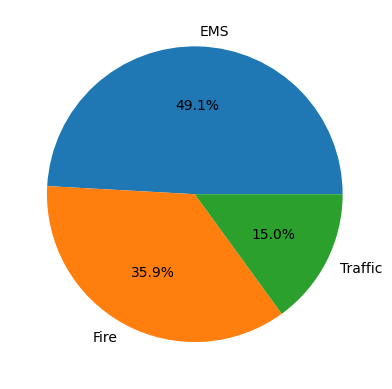

In [102]:
ax = plt.pie(count,labels=labels,autopct='%1.1f%%')

### Now use seaborn to create a countplot of 911 calls by Reason. 

<Axes: xlabel='Reason', ylabel='count'>

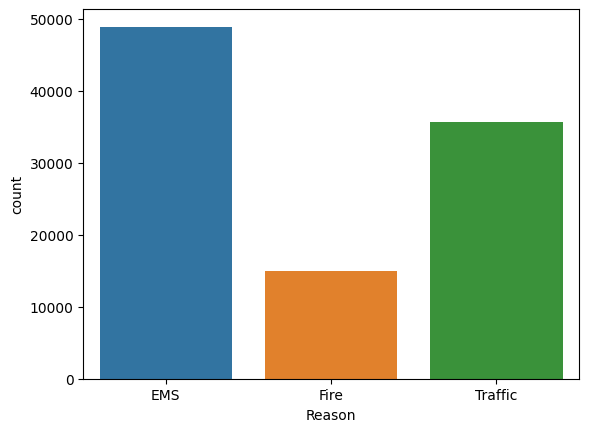

In [103]:
sns.countplot(x='Reason',data=df_emer)

### Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [104]:
df_emer.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [105]:
df_emer['timeStamp']=pd.to_datetime(df_emer['timeStamp'])

In [106]:
time = df_emer['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [107]:
time.hour

17

In [108]:
time.month

12

In [109]:
time.day_of_week

3

### Create the following new columns:
- Now that the timestamp column are actually DateTime objects.
- use <b>.apply()</b> to create 3 new columns called Hour, Month, and Day of Week.
- You will create these columns based off of the timeStamp column.

In [110]:
df_emer['Hour']=df_emer['timeStamp'].apply(lambda x: x.hour)
df_emer['Month']=df_emer['timeStamp'].apply(lambda x: x.month)
df_emer['Day']=df_emer['timeStamp'].apply(lambda x: x.day_of_week)

In [111]:
df_emer.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [112]:
df_emer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
 10  Hour       99492 non-null  int64         
 11  Month      99492 non-null  int64         
 12  Day        99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


### Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

In [113]:
df_emer.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


<Axes: xlabel='Day', ylabel='count'>

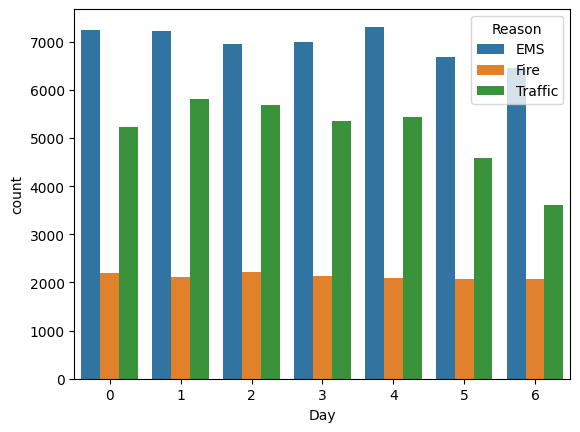

In [114]:
sns.countplot(x='Day',data=df_emer,hue='Reason')

### Use map function to change the Day of Week from numbers to actual days and replot.

In [115]:
day_day={0:'Monday',1:'Tuesday',2:'Wednsday',3:'Tursday',4:'Friday',5:'Saturday',6:'Monday'}
df_emer['Day']=df_emer['Day'].map(day_day)

<Axes: xlabel='Day', ylabel='count'>

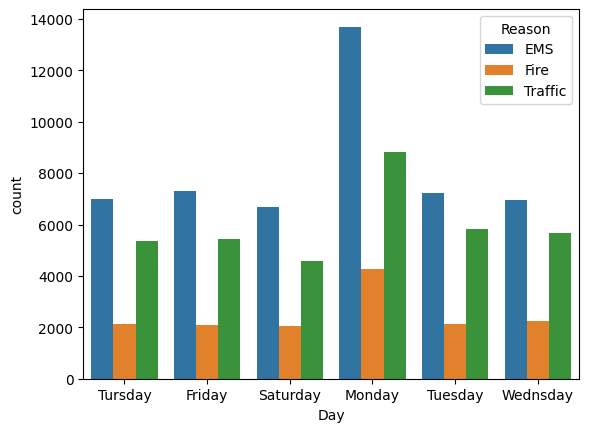

In [116]:
sns.countplot(x='Day',data=df_emer,hue='Reason')

### Use seaborn to create a countplot of the Month column with the hue based off of the Reason column. 

<Axes: xlabel='Month', ylabel='count'>

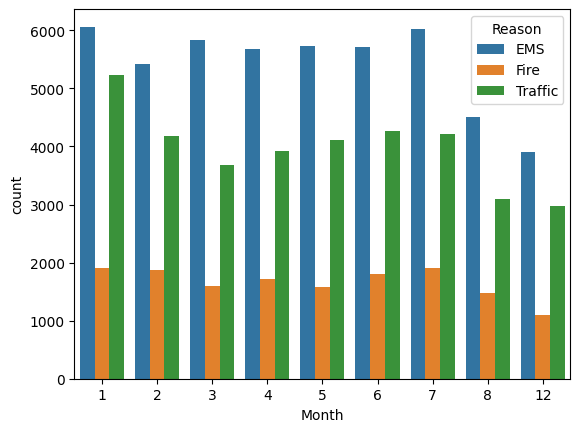

In [117]:
sns.countplot(x='Month',data=df_emer,hue='Reason')

## Other data analysis

In [118]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


### Find the sum of the values for the Ages and Ratings

In [119]:
age_sum=df['Age'].sum()
rat_sum=df['Rating'].sum()
age_sum


382

In [120]:
rat_sum

44.919999999999995

### Find the average age and rating

In [121]:
rat_avg=df['Rating'].mean()
rat_avg

3.7433333333333327

In [122]:
age_avg=df['Age'].mean()
age_avg

31.833333333333332

### Find the standard deviation of age and rating

In [123]:
rat_std=df['Rating'].std()
rat_std

0.6616279280316959

In [124]:
age_std=df['Age'].std()
age_std

9.232682396921506

### Find the minimum of age and rating

In [125]:
rat_min=df['Rating'].min()
rat_min

2.56

In [126]:
age_min=df['Age'].min()
age_min

23

### Find the maximum of age and rating

In [127]:
rat_max=df['Rating'].max()
rat_max
age_max=df['Age'].max()
age_max

51

### Find the median of age and rating

In [128]:
age_median=df['Age'].median()
age_median

29.5

In [129]:
rat_median=df['Rating'].median()
rat_median

3.79

### Find the mode of age

In [130]:
age_mode=df['Age'].mode()
age_mode
pd.DataFrame(age_mode)

,Age
0,23
1,25
2,30


### Find the value_counts() of age to check the frequency of each age.

In [131]:
count=df['Age'].value_counts()
count

Age
25    2
23    2
30    2
26    1
29    1
34    1
40    1
51    1
46    1
Name: count, dtype: int64

### Use count plot of age to see the frequency of each age.

<Axes: xlabel='Age', ylabel='count'>

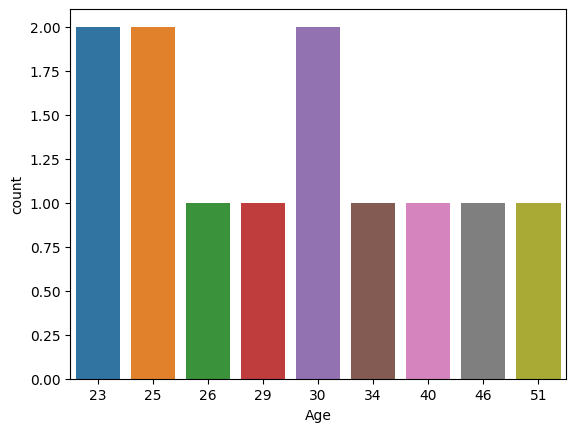

In [132]:
sns.countplot(x='Age',data=df)

### Use histplot to see the distribution of ages and ratings.

<Axes: xlabel='Age', ylabel='Count'>

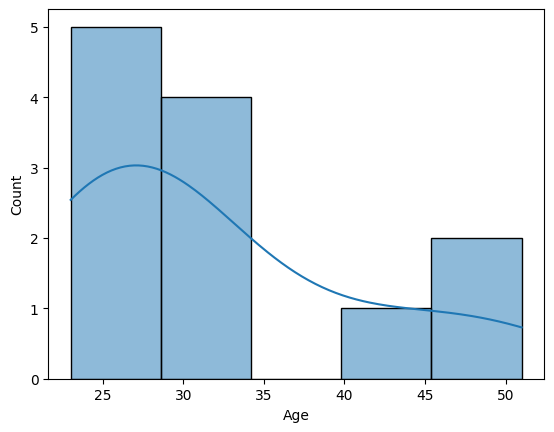

In [133]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Rating', ylabel='Count'>

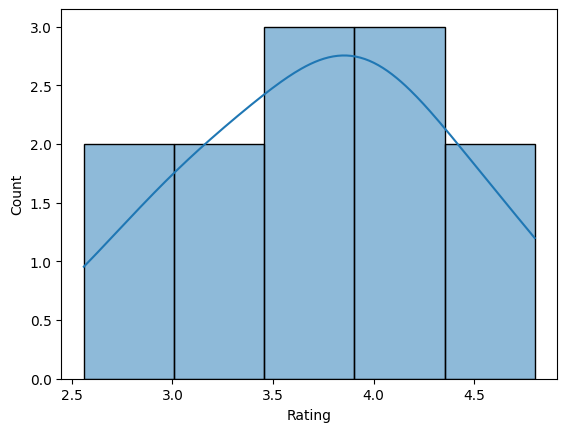

In [134]:
sns.histplot(df['Rating'],kde=True)

### Display the descriptive statistics of the dataframe

In [135]:
df_frame=pd.DataFrame(df)
df_frame

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


In [136]:
df_frame.describe()

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


## Titanic Data Analysis
[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
##### Features:
- survival - Survival (0 = No; 1 = Yes)
- pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Read the Titanic.csv file into Pandas dataframe

In [137]:
df_titanic=pd.read_csv('/kaggle/input/titanic/Titanic - Titanic.csv')

### Display the info of the dataframe

In [138]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Display the descriptive statistics of the dataframe

In [139]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Perform pairplot of the dataframe

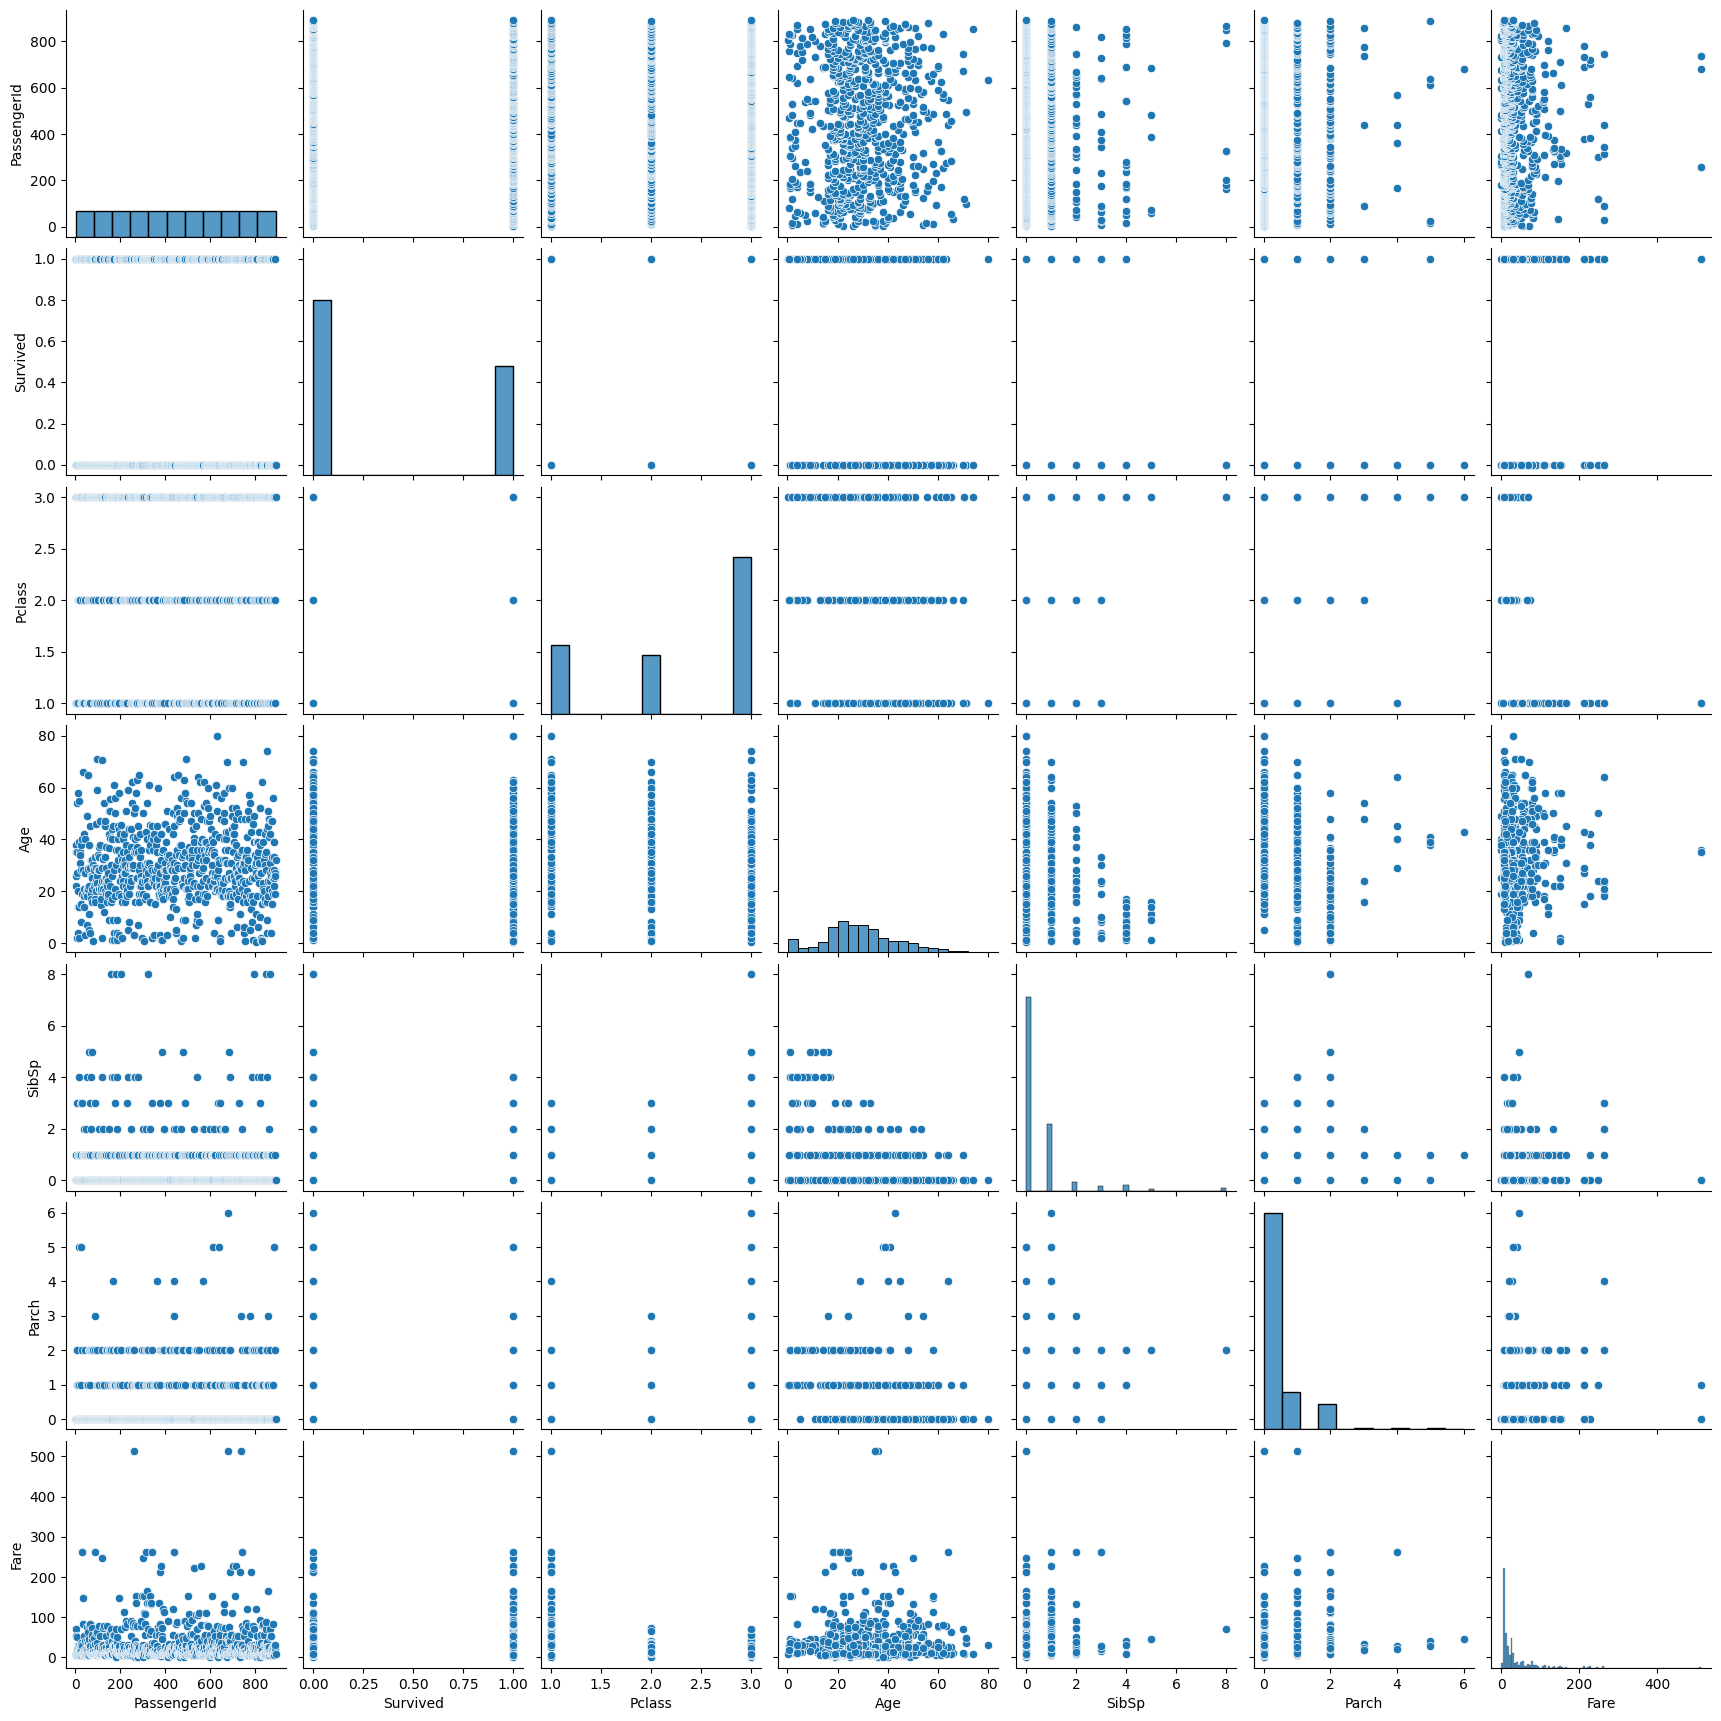

In [140]:
sns.pairplot(df_titanic)

### Perform pairplot of the dataframe with hue='Survived'

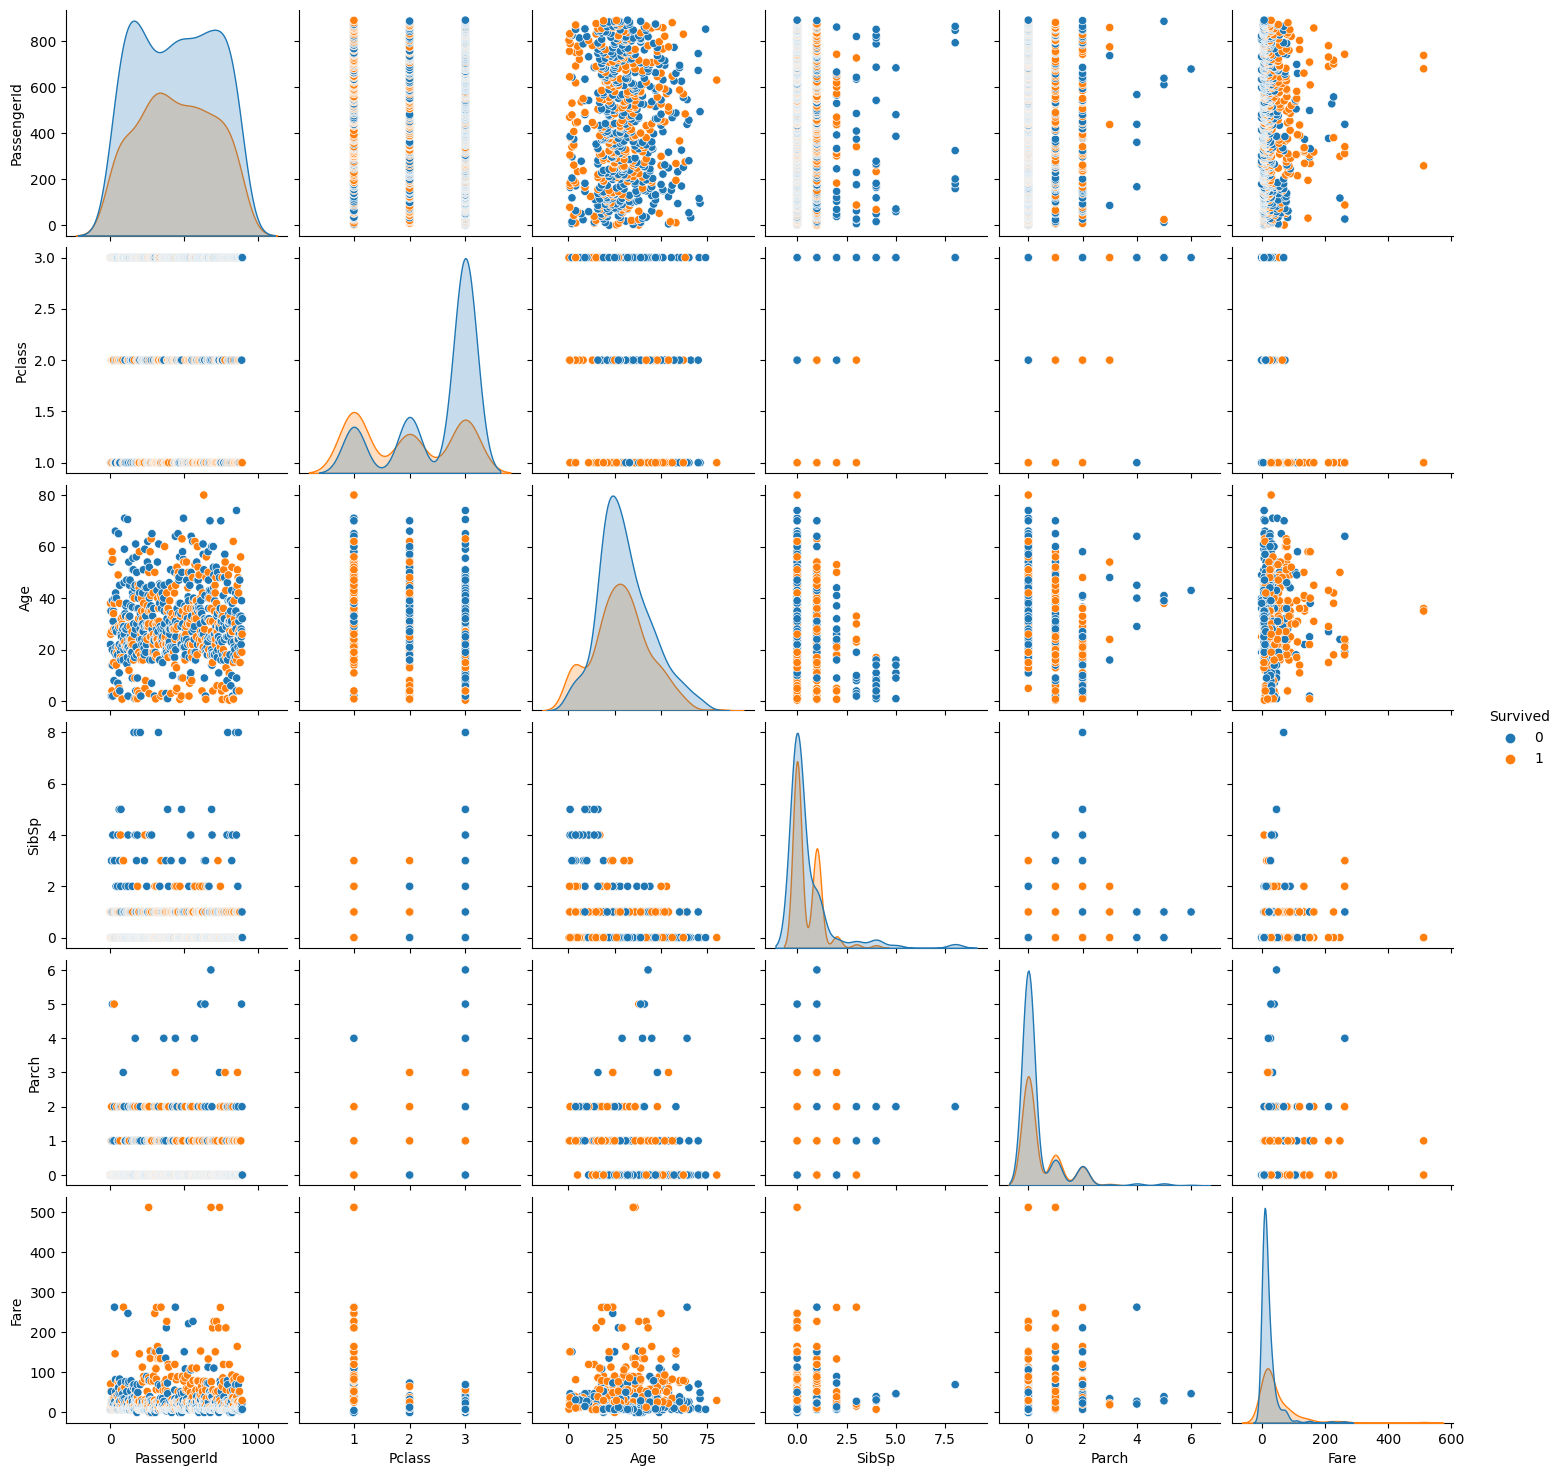

In [141]:
sns.pairplot(df_titanic,hue='Survived')

### Use pie chart to see the percentage of Survived/Unservived people

In [142]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
values=df_titanic['Survived'].value_counts()
values

Survived
0    549
1    342
Name: count, dtype: int64

In [144]:
labels=df_titanic['Survived'].unique()
labels

array([0, 1])

([<matplotlib.patches.Wedge at 0x7a1329b37d60>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

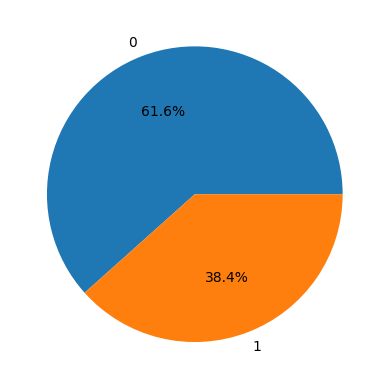

In [145]:
plt.pie(values,labels=labels,autopct='%1.1f%%')

### Use pie chart to see the percentage of Passenger Class (Pclass)

In [146]:
labels=df_titanic['Pclass'].unique()
labels

array([3, 1, 2])

In [147]:
values=df_titanic['Pclass'].value_counts()
values

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7a1329984250>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

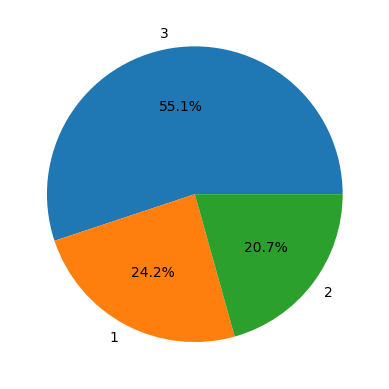

In [148]:
plt.pie(values,labels=labels,autopct='%1.1f%%')

### Use count plot to display  how many people survived vs. unservived

<Axes: xlabel='Survived', ylabel='count'>

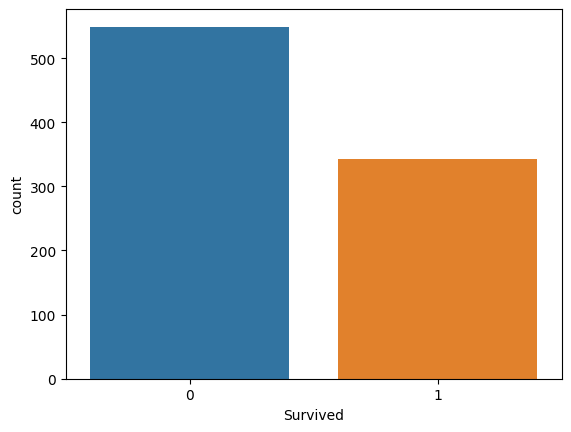

In [149]:
sns.countplot(x='Survived',data=df_titanic)

### Use count plot to display  how many people survived vs. unservived categorized by gender (sex)

<Axes: xlabel='Survived', ylabel='count'>

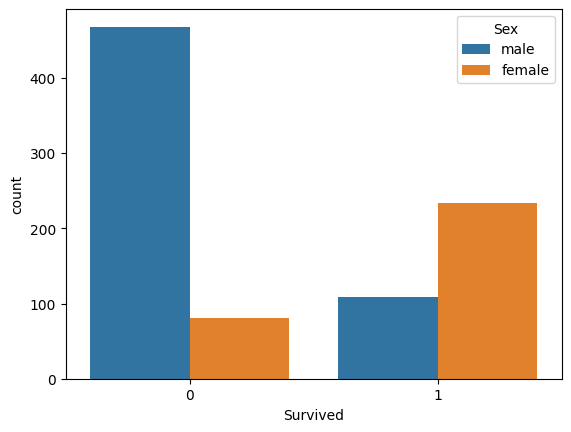

In [150]:
sns.countplot(x='Survived',data=df_titanic,hue='Sex')

### Use count plot to display  how many people survived vs. unservived categorized by Pclass

<Axes: xlabel='Survived', ylabel='count'>

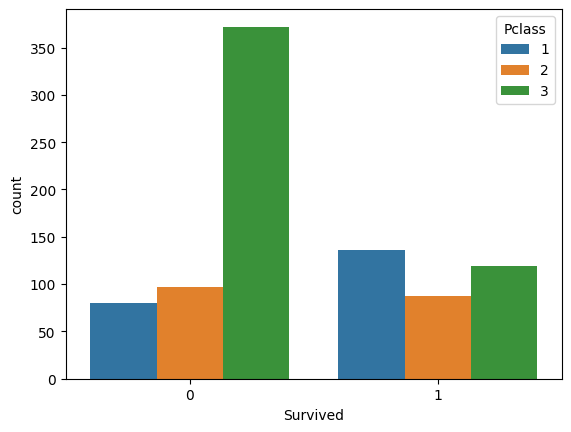

In [151]:
sns.countplot(x='Survived',data=df_titanic,hue='Pclass')

### Check the distribution of Age

<Axes: xlabel='Age', ylabel='Count'>

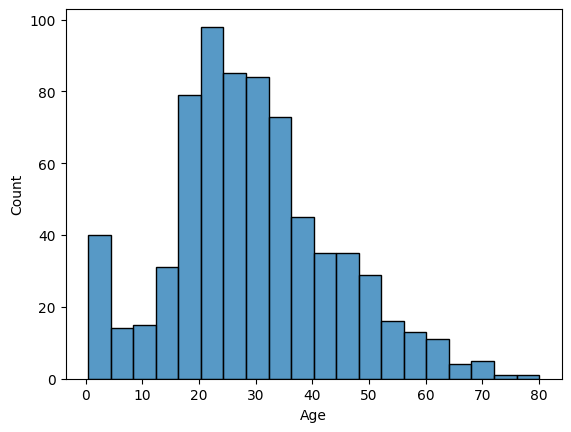

In [152]:
sns.histplot(x= df_titanic['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

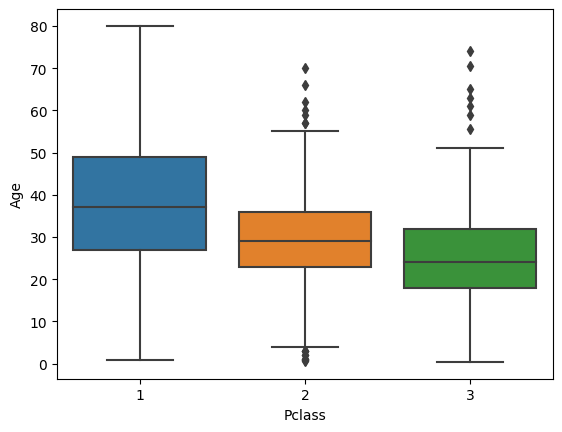

In [153]:
sns.boxplot(x='Pclass',y='Age',data=df_titanic, orient="v")

### Use box plot to display  the distribution of Age for survived/unservived passangers

<Axes: xlabel='Survived', ylabel='Age'>

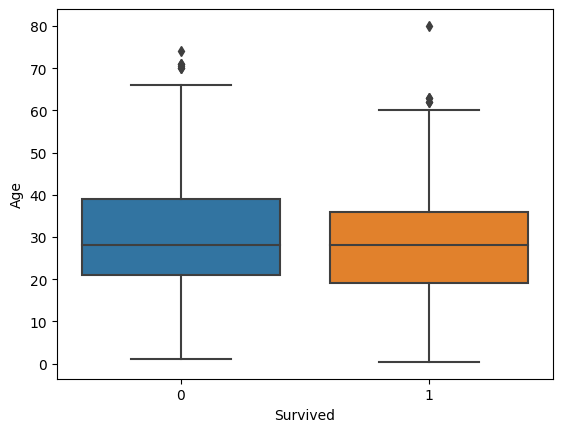

In [154]:
sns.boxplot(x='Survived',y='Age',data=df_titanic, orient="v")

### Display the distribution of the ticket fare (Fare)

<Axes: xlabel='Fare', ylabel='Count'>

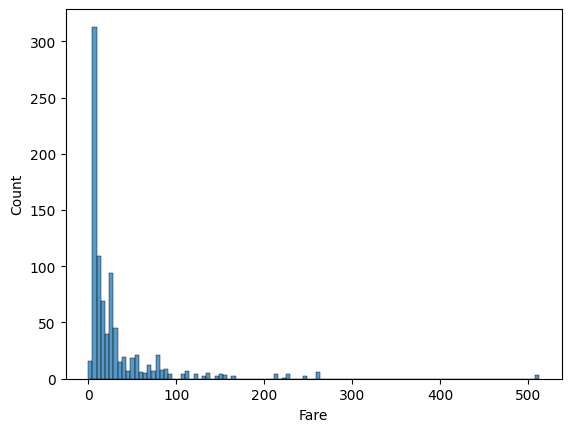

In [155]:
sns.histplot(x= df_titanic['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

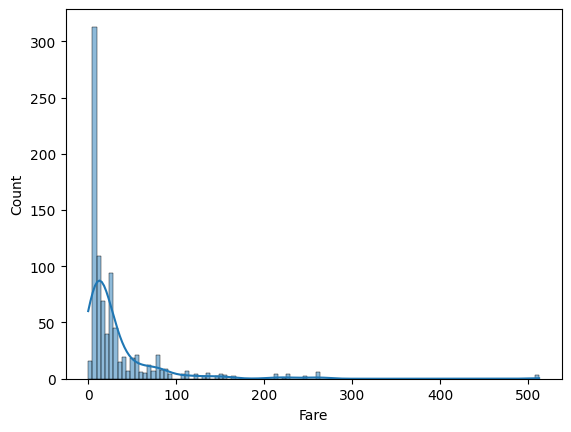

In [156]:
sns.histplot(x= df_titanic['Fare'],kde=True)

### Calculate the mean Fare

In [157]:
mean_fare = df_titanic['Fare'].mean()
mean_fare

32.204207968574636

### Calculate the mode Fare

In [158]:
mode_fare = df_titanic['Fare'].mode()
mode_fare

0    8.05
Name: Fare, dtype: float64

### Calculate the median Fare

In [159]:
median_fare = df_titanic['Fare'].median()
median_fare

14.4542

### Calculate the min,max and quartiles of Fare

In [160]:
min_fare = df_titanic['Fare'].min()
min_fare
max_fare = df_titanic['Fare'].max()
max_fare
q1 = df_titanic['Fare'].quantile(0.25)  
median = df_titanic['Fare'].quantile(0.50)  
q3 = df_titanic['Fare'].quantile(0.75)

In [161]:
min_fare

0.0

In [162]:
max_fare

512.3292

In [163]:
q1

7.9104

In [164]:
q3

31.0

In [165]:
median

14.4542

### Display the distribution of the ticket fare (Fare) with mean, mode, and median

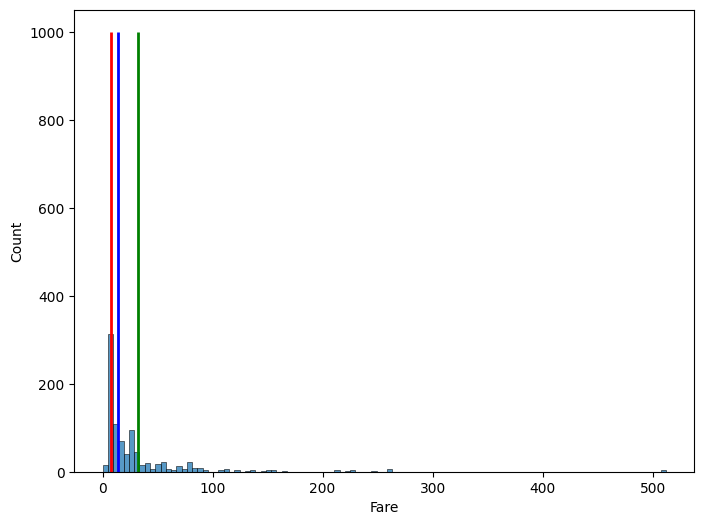

In [166]:
plt.figure(figsize=(8, 6))
plt.vlines(mode_fare, 0, 1000, colors='r', lw=2)
plt.vlines(mean_fare, 0, 1000, colors='g', lw=2)
plt.vlines(median_fare, 0, 1000, colors='b', lw=2)
ax = sns.histplot(x=df_titanic['Fare'])


### Display the distribution of the ticket fare (Fare) with histplot and boxplot

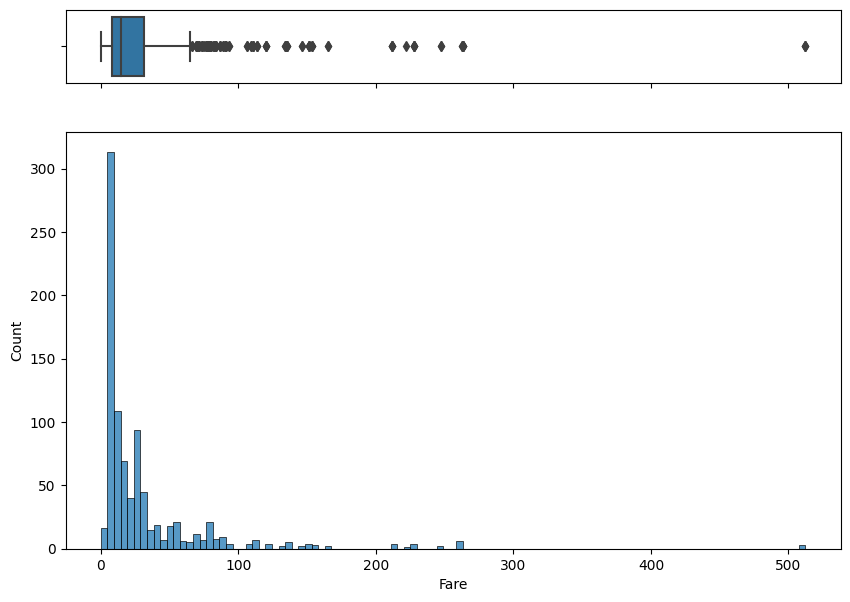

In [167]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(10, 7))
 
# assigning a graph to each ax
sns.boxplot(x=df_titanic["Fare"], ax=ax_box)
sns.histplot(data=df_titanic, x="Fare", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
# f.set_figheight(15)
# f.set_figwidth(15)
# plt.xlim(0,0.4*1e7)
plt.show()

### Can you tell what kind of skewness of the Fare data?

positive skweed

### Use any technique to convert the skewed data to unskewed data and replot
##### Hint: Drop the rows with 0 fare.

In [ ]:

df_titanic['Fare'] = np.log(df_titanic['Fare'])


In [ ]:
df_titanic.dropna(subset=['Fare'], inplace=True)

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(10, 7))
 
# assigning a graph to each ax
sns.boxplot(x=df_titanic["Fare"], ax=ax_box)
sns.histplot(data=df_titanic, x="Fare", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
# f.set_figheight(15)
# f.set_figwidth(15)
# plt.xlim(0,0.4*1e7)
plt.show()